In [19]:
from exod.xmm.observation import Observation
from exod.pre_processing.download_observations import read_observation_ids
from scipy.stats import binned_statistic_dd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

In [20]:
from exod.utils.path import data, data_results
import random
# Load observation IDs
obsids = read_observation_ids(data / 'observations.txt')

In [22]:
https://arxiv.org/list/astro-ph.HE/recentfrom exod.xmm.event_list import EventList

In [50]:
evt = EventList('/home/nkhan/EXOD2/data/processed/0001730201/P0001730201PNU002PIEVLI0000_FILT.fits')
evt.read()
d = evt.data
d

2024-02-07 12:20:47,294 - INFO - event_list.py:remove_bad_rows - Removing Bad PN Rows Struder et al. 2001b
2024-02-07 12:20:47,305 - INFO - event_list.py:remove_borders - Removing Borders: EPN PrimeFullWindow


TIME,RAWX,RAWY,DETX,DETY,X,Y,PHA,PI,FLAG,PATTERN,PAT_ID,PAT_SEQ,CCDNR,TIME_RAW
float64,int16,int16,int16,int16,int32,int32,int16,int16,int32,uint8,int16,uint8,uint8,float64
100532388.78400593,25,66,-4272,10023,28561,34660,1586,7997,0,0,0,0,1,100532388.77000064
100532389.73309448,44,105,-5865,6808,30367,31560,598,3205,0,0,0,0,1,100532389.72374253
100532390.18665242,28,35,-4494,12611,28607,37257,510,4083,0,1,5121,0,1,100532390.16394506
100532390.17516166,9,159,-2941,2355,27751,26920,779,4056,0,0,0,0,1,100532390.16394506
100532390.73540616,35,107,-5081,6654,29596,31354,829,4292,0,0,0,0,1,100532390.75086471
100532391.05861443,49,166,-6241,1763,31084,26552,106,606,0,0,0,0,1,100532391.04430662
100532392.63651156,33,52,-4921,11180,29130,35859,952,4768,0,0,0,0,1,100532392.65834847
100532393.26635472,34,94,-5033,7748,29474,32442,361,1873,0,0,0,0,1,100532393.2452707
100532393.46993232,45,143,-5931,3693,30644,28457,2086,11168,0,0,0,0,1,100532393.46537068


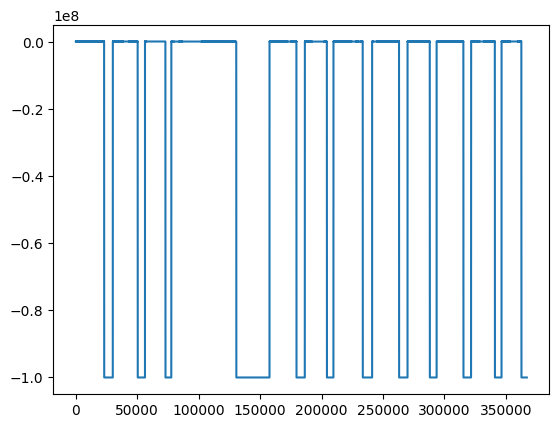

In [48]:
plt.plot(d['X'])

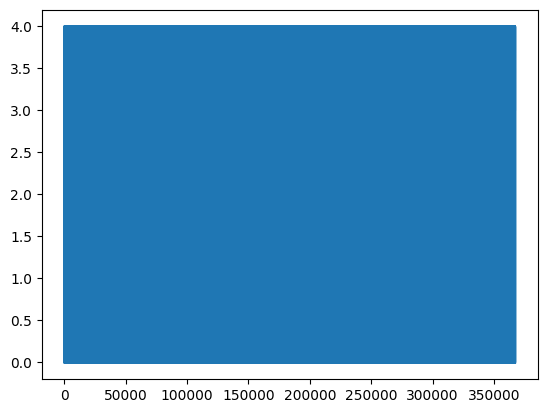

In [47]:
plt.plot(d['PATTERN'])


In [37]:
d

TIME,RAWX,RAWY,DETX,DETY,X,Y,PHA,PI,FLAG,PATTERN,CCDNR
float64,int16,int16,int16,int16,int32,int32,int16,int16,int32,uint8,uint8
100529507.42554197,404,125,2274,-3862,26881,28209,2396,8173,0,0,1
100529507.03228047,278,293,-498,-155,24332,24346,109,390,256,0,1
100529507.15647307,295,308,-126,176,24723,24037,262,896,0,0,1
100529507.33838817,300,331,-18,676,24860,23544,251,873,0,0,1
100529505.33966699,567,479,5860,3929,30919,20642,445,1551,0,0,1
100529506.01579645,90,545,-4639,5390,20524,18567,444,1546,0,0,1
100529508.1187966,534,53,5148,-5450,29657,29963,1286,4386,0,0,1
100529510.37730516,549,132,5461,-3705,30072,28240,237,825,0,1,1
100529509.70319332,453,210,3360,-1993,28075,26407,2570,8784,0,0,1


In [35]:

obsid = '0001730201'
obs = Observation(obsid)
obs.get_files()
for e in obs.events_processed:
    try:
        e.read()
    except NotImplementedError:
        print(e.filename)
    d = e.data
    print(e.path)
    print(d)
    print(d[d['X'] < 0])

2024-02-06 15:47:07,907 - INFO - event_list.py:remove_bad_rows - Removing Bad PN Rows Struder et al. 2001b
2024-02-06 15:47:07,918 - INFO - event_list.py:remove_borders - Removing Borders: EPN PrimeFullWindow


/home/nkhan/EXOD2/data/processed/0001730201/P0001730201PNU002PIEVLI0000_FILT.fits
       TIME        RAWX RAWY  DETX   DETY      X         Y     PHA    PI   FLAG PATTERN PAT_ID PAT_SEQ CCDNR      TIME_RAW     
------------------ ---- ---- ------ ------ --------- --------- ---- ----- ----- ------- ------ ------- ----- ------------------
100532388.78400593   25   66  -4272  10023     28561     34660 1586  7997     0       0      0       0     1 100532388.77000064
100532389.73309448   44  105  -5865   6808     30367     31560  598  3205     0       0      0       0     1 100532389.72374253
100532390.18665242   28   35  -4494  12611     28607     37257  510  4083     0       1   5121       0     1 100532390.16394506
100532390.17516166    9  159  -2941   2355     27751     26920  779  4056     0       0      0       0     1 100532390.16394506
100532390.73540616   35  107  -5081   6654     29596     31354  829  4292     0       0      0       0     1 100532390.75086471
100532391.05861443   4

2024-02-06 15:22:18,991 - INFO - event_list.py:remove_bad_rows - Removing Bad PN Rows Struder et al. 2001b
2024-02-06 15:22:19,003 - INFO - event_list.py:remove_borders - Removing Borders: EPN PrimeFullWindow


'P0001730201PNU002PIEVLI0000_FILT.fits'

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   45 / width of table in bytes                        
NAXIS2  =               421051 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   15 / number of fields in each row                   
TTYPE1  = 'TIME    '           / Event Time                                     
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 's       '           / physical unit of field                         
TTYPE2  = 'RAWX    '           / Event X Position                               
TFORM2  = 'I       '        

In [11]:
evt.data

TIME,RAWX,RAWY,DETX,DETY,X,Y,PHA,PI,FLAG,PATTERN,PAT_ID,PAT_SEQ,CCDNR,TIME_RAW
float64,int16,int16,int16,int16,int32,int32,int16,int16,int32,uint8,int16,uint8,uint8,float64
100532388.78400593,25,66,-4272,10023,28561,34660,1586,7997,0,0,0,0,1,100532388.77000064
100532389.73309448,44,105,-5865,6808,30367,31560,598,3205,0,0,0,0,1,100532389.72374253
100532390.18665242,28,35,-4494,12611,28607,37257,510,4083,0,1,5121,0,1,100532390.16394506
100532390.17516166,9,159,-2941,2355,27751,26920,779,4056,0,0,0,0,1,100532390.16394506
100532390.73540616,35,107,-5081,6654,29596,31354,829,4292,0,0,0,0,1,100532390.75086471
100532391.05861443,49,166,-6241,1763,31084,26552,106,606,0,0,0,0,1,100532391.04430662
100532392.63651156,33,52,-4921,11180,29130,35859,952,4768,0,0,0,0,1,100532392.65834847
100532393.26635472,34,94,-5033,7748,29474,32442,361,1873,0,0,0,0,1,100532393.2452707
100532393.46993232,45,143,-5931,3693,30644,28457,2086,11168,0,0,0,0,1,100532393.46537068


In [6]:
d = evt.data
x, y = d['X'], d['Y']
sample = x,y
bin_x = np.linspace(np.min(x),np.max(x),1000)
bin_y = np.linspace(np.min(y),np.max(y),1000)
s,be,bn = binned_statistic_dd(sample,
                              values='none',
                              statistic='count',
                              bins=[bin_x,bin_y])

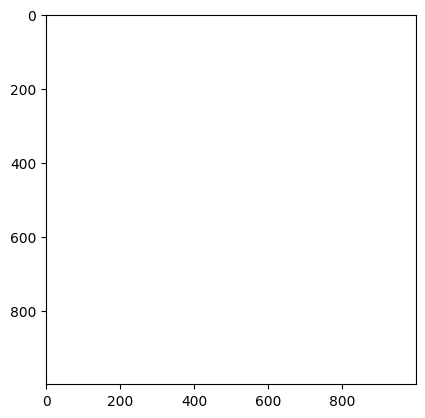

In [7]:
plt.imshow(s, norm=LogNorm(), interpolation='none')

In [ ]:
evt.data[['TIME','RAWX','RAWY','DETX','DETY','X','Y','PHA','PI','FLAG','PATTERN','CCDNR']]